In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
# import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
#plt.style.use('fivethirtyeight')
import xgboost as xgb
import sklearn
import random
from NecessaryModules.getData import getData

from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
# from NecessaryModules.splitData import split_data

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
filename = '../shot_listed_dataset/CoverTypeNewNormalized.csv'
dataset=getData(filename).values.tolist()
random.shuffle(dataset)
dataset=pd.DataFrame(dataset) #from dataset_list to dataset_dataframe after suffling
# print(dataset)

   Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0   0.850622  0.105556  0.150943                          0.045351   
1   0.879149  0.163889  0.188679                          0.426304   
2   0.767116  0.327778  0.320755                          0.068027   
3   0.791494  0.338889  0.226415                          0.294785   
4   0.867220  0.575000  0.584906                          0.385488   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                       -0.003509                         0.631060   
1                        0.189474                         0.177358   
2                        0.038596                         0.259652   
3                       -0.077193                         0.085486   
4                        0.314035                         0.074020   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.866142        0.874016          0.548   
1       0.897638        0.866142          0.500   
2    

# process data

In [4]:
X=dataset.iloc[:,0:-1]
y=dataset.iloc[:,-1]

In [5]:
def split_data(data):
    # splitting the data
    
    msk = np.random.rand(len(data)) < 0.8
    yy = [54] #test title is 54 after suffleing the dataframe 
    train = data[msk]
    test = data[~msk]
    x_train = train[train.columns[:train.shape[1] - 1]]  # all columns except the last are x variables
    y_train = train[yy[0]].tolist()  # the last column as y variable
    x_test = test[test.columns[:test.shape[1] - 1]]
    y_test = test[yy[0]].tolist()  # the last column as y variable
    y_train = [0 if i == 7 else i for i in y_train]  # replace label 7 with 0
    y_test = [0 if i == 7 else i for i in y_test]  # replace label 7 with 0
    return x_train, y_train, x_test, y_test

# RFE implement


In [6]:
X=dataset.iloc[:,0:-1]
y=dataset.iloc[:,-1]

In [7]:
# from NecessaryModules.splitData import split_data
X_train, y_train, X_test, y_test = split_data(dataset)
print(len(X_train))

15303


In [8]:
estimator = SVR(kernel="linear")
model = RFE(estimator, n_features_to_select=40, step=1)
model.fit_transform(X,y)



array([[0.6530083 , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.68724066, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.75129668, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.65845436, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.72354772, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.59906639, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [9]:
compressed_dataset_X= model.transform(X) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X))
print(len(compressed_dataset_X))
print(compressed_dataset_X)

<class 'numpy.ndarray'>
19229
[[0.6530083  1.         0.         ... 0.         0.         0.        ]
 [0.68724066 0.         0.         ... 0.         0.         0.        ]
 [0.75129668 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.65845436 0.         0.         ... 0.         0.         0.        ]
 [0.72354772 0.         0.         ... 0.         0.         0.        ]
 [0.59906639 1.         0.         ... 0.         0.         0.        ]]


In [10]:
compressed_dataset_X_train= model.transform(X_train) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_train))
print(len(compressed_dataset_X_train))
print(compressed_dataset_X_train)

compressed_dataset_X_test= model.transform(X_test) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_test))
print(len(compressed_dataset_X_test))
print(compressed_dataset_X_test)

<class 'numpy.ndarray'>
15303
[[0.6530083  1.         0.         ... 0.         0.         0.        ]
 [0.68724066 0.         0.         ... 0.         0.         0.        ]
 [0.75129668 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.65845436 0.         0.         ... 0.         0.         0.        ]
 [0.72354772 0.         0.         ... 0.         0.         0.        ]
 [0.59906639 1.         0.         ... 0.         0.         0.        ]]
<class 'numpy.ndarray'>
3926
[[0.6278527  1.         0.         ... 0.         0.         0.        ]
 [0.83376556 0.         0.         ... 0.         1.         0.        ]
 [0.72536307 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.83973029 0.         0.         ... 0.         1.         0.        ]
 [0.71939834 0.         0.         ... 0.         0.         0.        ]
 [0.62889004 1.         0.         ... 0.         0.         0.        ]]


# MLP (tunning)

In [11]:
#Use Optuna to find the best hyperparameters
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
K = 5 # stratified 5 fold cross validation, The folds are made by preserving the percentage of samples for each class.
skf = StratifiedKFold(n_splits = K, random_state = 42, shuffle = True)

train_tunned= np.array(compressed_dataset_X)
target_train_tunned= np.array(y)

oof_preds= np.zeros((len(train_tunned)))
abs_error_arr=[]
def objective_MLP(trial):

 for train_index, val_index in (skf.split(compressed_dataset_X,y)):
    train_X, valid_X = train_tunned[train_index], train_tunned[val_index]
    train_Y, valid_Y = target_train_tunned[train_index], target_train_tunned[val_index]
    param={
        'hidden_layer_sizes':trial.suggest_int("hidden_layer_sizes", 150, 500),
        # solver=trial.suggest_categorical("solver", ["lbfgs", "sgd", "adam"]),
        'learning_rate':trial.suggest_categorical("learning_rate", ["constant", "invscaling", "adaptive"]),
        'random_state':trial.suggest_int("random_state",0, 10),
        'max_iter':trial.suggest_int("max_iter",100,1000),
        'activation':trial.suggest_categorical("activation", ["logistic", "tanh", "relu"]),
        'batch_size':trial.suggest_int("batch_size",2,20),
        
    }
    model=MLPClassifier(**param)
    model.fit(train_X, train_Y)
    preds = model.predict(valid_X)
    oof_preds[val_index] = preds 
 return accuracy_score(target_train_tunned, oof_preds)

In [12]:
study = optuna.create_study(direction='maximize' ,study_name='MLP_tune')


[I 2024-02-20 12:26:11,502] A new study created in memory with name: MLP_tune


In [13]:
study.optimize(objective_MLP, n_trials=10)

[I 2024-02-20 12:38:57,691] Trial 0 finished with value: 0.6566124083415674 and parameters: {'hidden_layer_sizes': 234, 'learning_rate': 'constant', 'random_state': 2, 'max_iter': 369, 'activation': 'tanh', 'batch_size': 7}. Best is trial 0 with value: 0.6566124083415674.
[I 2024-02-20 12:47:07,187] Trial 1 finished with value: 0.663893078163191 and parameters: {'hidden_layer_sizes': 167, 'learning_rate': 'adaptive', 'random_state': 7, 'max_iter': 924, 'activation': 'logistic', 'batch_size': 10}. Best is trial 1 with value: 0.663893078163191.
[I 2024-02-20 12:51:55,996] Trial 2 finished with value: 0.6544282073950803 and parameters: {'hidden_layer_sizes': 251, 'learning_rate': 'invscaling', 'random_state': 10, 'max_iter': 279, 'activation': 'tanh', 'batch_size': 17}. Best is trial 1 with value: 0.663893078163191.
[I 2024-02-20 13:09:13,050] Trial 3 finished with value: 0.656456393988247 and parameters: {'hidden_layer_sizes': 333, 'learning_rate': 'constant', 'random_state': 3, 'max_ite

In [14]:
#evaluate the trial
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  10
Best trial:
  Value:  0.6976441832648603
  Params: 
    hidden_layer_sizes: 207
    learning_rate: invscaling
    random_state: 8
    max_iter: 566
    activation: relu
    batch_size: 14


In [15]:
from matplotlib import pyplot as plt
fig_study = optuna.visualization.plot_parallel_coordinate(study, params=["hidden_layer_sizes", "learning_rate","random_state","max_iter","batch_size"])
fig_study.show()

# fit_tunned_MLP

In [16]:
# Let us make predictions for each of the 5 models and find mean 
# of those predictions

from tqdm import tqdm
train_MLP = np.array(compressed_dataset_X_train)
target_train_MLP= np.array(y_train)

test_MLP = np.array(compressed_dataset_X_test) # or test_Ada = np.array(X)


test_preds_MLP = np.zeros((len(test_MLP)))
oof_preds_MLP = np.zeros((len(train_MLP)))

for train_index, val_index in tqdm(skf.split(compressed_dataset_X_train,y_train), total=5):
    train_X, valid_X = train_MLP[train_index], train_MLP[val_index]
    train_y, valid_y = target_train_MLP[train_index], target_train_MLP[val_index]
    ada_params = study.best_trial.params
    model_MLP_2 = MLPClassifier(**ada_params,tol=.00001,early_stopping=True) # for early_stopping
    model_MLP_2.fit(train_X, train_y)
    # for train accuracy
    preds = model_MLP_2.predict(valid_X)
    oof_preds_MLP[val_index] = preds
    # for test accuracy
    preds = model_MLP_2.predict(test_MLP)
    test_preds_MLP += (preds)/5
print(np.abs(oof_preds_MLP-target_train_MLP).mean())

100%|██████████| 5/5 [02:14<00:00, 26.86s/it]

0.6559498137620074


In [17]:
import pickle

pickle.dump(model_MLP_2, open("all_pkl_file/all_tuned_model/RFE_MLP_fitted.pkl", "wb"))

In [18]:
target_test_MLP = np.array(y_test)

In [19]:
from sklearn.metrics import accuracy_score
valid_Acc_MLP=accuracy_score(target_train_MLP,oof_preds_MLP)
print(valid_Acc_MLP)

# another technique for calculate test accuracy
test_Acc_MLP=accuracy_score(target_test_MLP,test_preds_MLP.round())
print(test_Acc_MLP)

0.6732666797359995
0.6263372389200204


In [20]:
train_Acc_MLP=model_MLP_2.score(compressed_dataset_X_train,y_train)
print(train_Acc_MLP)

0.6814350127425995


In [21]:
test_Acc_MLP=model_MLP_2.score(compressed_dataset_X_test,y_test)
print(test_Acc_MLP)

0.6833927661742232


In [22]:



classifier=MLPClassifier(batch_size=9, hidden_layer_sizes=381, learning_rate='invscaling',
              max_iter=447, random_state=0)
print(classifier)

epoch=20
train_A=[]
test_A=[]

for i in (1,epoch):
    train_acc = classifier.fit(compressed_dataset_X_train, y_train).score(compressed_dataset_X_train, y_train)
    train_A.append(train_acc)
    test_acc=classifier.score(compressed_dataset_X_test,y_test)
    test_A.append(test_acc)

print('train accuracy: {} \t test accuracy: {}'.format(np.max(train_A),np.max(test_A)))



MLPClassifier(batch_size=9, hidden_layer_sizes=381, learning_rate='invscaling',
              max_iter=447, random_state=0)


train accuracy: 0.6864667058746651 	 test accuracy: 0.6874681609780947


# Evaluation

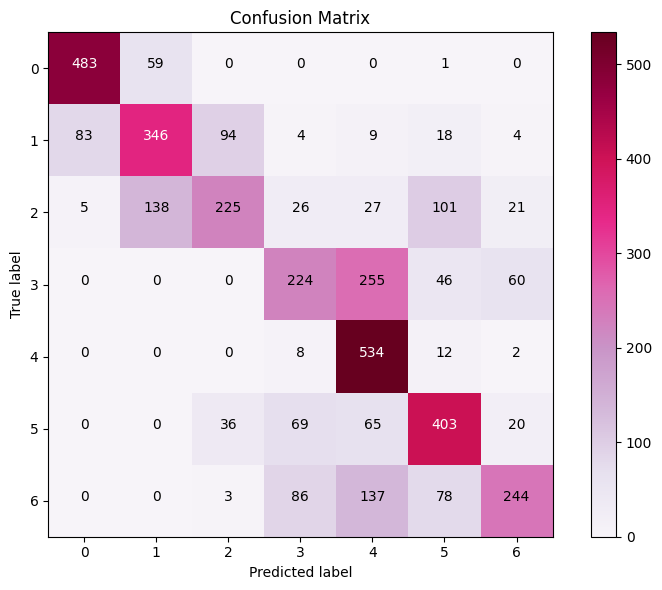

In [23]:
############# plot confusion matrix ############

from matplotlib import pyplot as plt
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, test_preds_MLP.round())
# Plot confusion matrix with custom color map

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.PuRd)  # Set cmap to custom color map
plt.title('Confusion Matrix')
plt.colorbar()

# Adding annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), #'d = integer
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout() #improves the layout of plots by preventing overlapping elements such as axis labels, tick labels, and titles
plt.show()


**ROC_curve**

In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [25]:
# Binarize the output
y_train = label_binarize(y_train,classes=[0,1,2,3,4,5,6])
n_classes = y_train.shape[1]
print(n_classes)
print(y_train[0])

7
[0 0 0 0 0 0 1]


In [26]:
# Binarize the output (y_test)
y_test = label_binarize(y_test,classes=[0,1,2,3,4,5,6])
n_classes = y_test.shape[1]
print(n_classes)
print(y_test[0])

7
[0 0 0 1 0 0 0]


In [27]:
# Learn to predict each class against the other
from sklearn.neural_network import MLPClassifier

ada_params = study.best_trial.params
clf = MLPClassifier(**ada_params,tol=.00001,early_stopping=True) #tuned MLP
classifier = OneVsRestClassifier(clf)

# Train the classifier
classifier.fit(compressed_dataset_X_train, y_train)

OneVsRestClassifier(estimator=MLPClassifier(batch_size=14, early_stopping=True,
                                            hidden_layer_sizes=207,
                                            learning_rate='invscaling',
                                            max_iter=566, random_state=8,
                                            tol=1e-05))

In [28]:
# Compute ROC curve and ROC area for each class
fpr = dict() #dictionary
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], classifier.predict_proba(compressed_dataset_X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

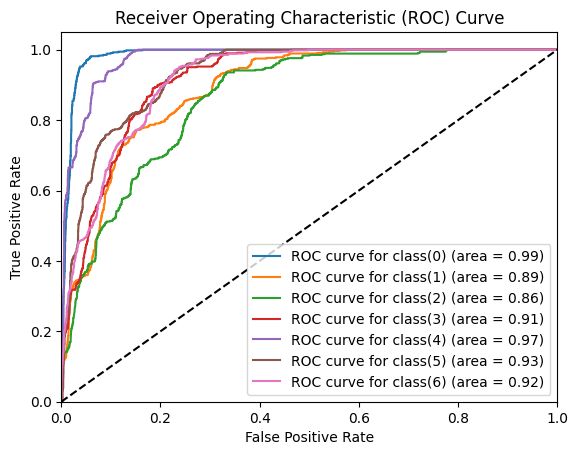

In [29]:
# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve for class(%i) (area = %0.2f)' % (i,roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="best")
plt.show()